<a href="https://colab.research.google.com/github/Saifullah785/deep-learning-ai-journey/blob/main/Lecture_17_batch_normalization_in_NN_using_Keras/Lecture_17_batch_normalization_in_NN_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification with and without Batch Normalization

This notebook demonstrates how to build and train simple neural networks for binary classification, comparing the performance of a model with and without Batch Normalization.

The steps covered in this notebook are:

1.  **Load and visualize the data:** The dataset, consisting of 2D data points and their corresponding class labels, is loaded and visualized to understand its distribution.
2.  **Prepare the data:** The features (X and Y coordinates) and the target variable (class) are separated.
3.  **Build and train a neural network without Batch Normalization:** A sequential neural network model is defined, compiled, and trained on the data.
4.  **Visualize the decision boundary (without Batch Normalization):** The decision boundary of the trained model is plotted to see how it separates the two classes.
5.  **Build and train a neural network with Batch Normalization:** A second sequential neural network model is defined, including Batch Normalization layers, compiled, and trained on the data.
6.  **Visualize the decision boundary (with Batch Normalization):** The decision boundary of the second model is plotted to compare it with the first model.
7.  **Compare validation accuracy:** The validation accuracy of both models over the training epochs is plotted to observe the impact of Batch Normalization on convergence and performance.

In [16]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/concertriccir2.csv')

In [18]:
# Display the first 5 rows of the DataFrame to inspect the data
df.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


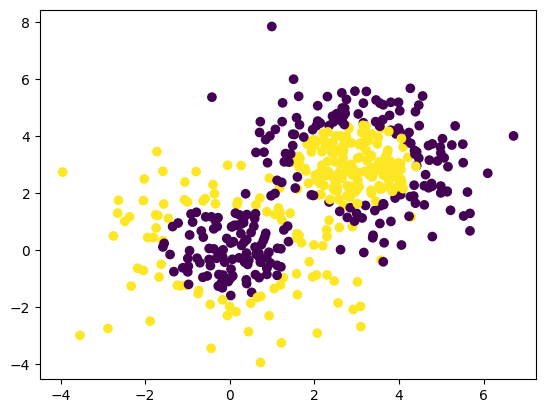

In [19]:
# Create a scatter plot of the data points, colored by their class
plt.scatter(df['X'],df['Y'],c=df['class'])

In [20]:
# Separate features (X and Y) and the target variable (class)
x = df.iloc[:,0:2].values # Features (X and Y columns)
y = df.iloc[:, -1].values # Target variable (class column)

In [21]:
# Import necessary libraries for building a neural network
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization

In [22]:
# Define the first neural network model (without Batch Normalization)
model = Sequential()

# Add layers to the model:
# Dense layer with 2 units and ReLU activation for the input layer (input_dim=2 for X and Y)
model.add(Dense(2, activation='relu', input_dim=2))
# Dense layer with 2 units and ReLU activation for a hidden layer
model.add(Dense(2, activation='relu'))
# Dense layer with 1 unit and Sigmoid activation for the output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Display a summary of the model's architecture
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Mount Google Drive to access the dataset file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# Compile the first model
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [25]:
# Train the first model and store the training history
history1 = model.fit(x,y, epochs=100, validation_split=0.2)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5169 - loss: 0.7229 - val_accuracy: 0.4300 - val_loss: 0.9251
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5431 - loss: 0.7418 - val_accuracy: 0.4300 - val_loss: 0.8919
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5332 - loss: 0.7450 - val_accuracy: 0.4300 - val_loss: 0.8637
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5324 - loss: 0.7183 - val_accuracy: 0.4300 - val_loss: 0.8400
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5740 - loss: 0.7162 - val_accuracy: 0.4300 - val_loss: 0.8195
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5941 - loss: 0.7014 - val_accuracy: 0.4300 - val_loss: 0.8022
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5924 - loss: 0.7002 - val_accuracy: 0.4300 - val_loss: 0.7877
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6005 - loss: 0.6994 - val_accuracy: 0.4400 -

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

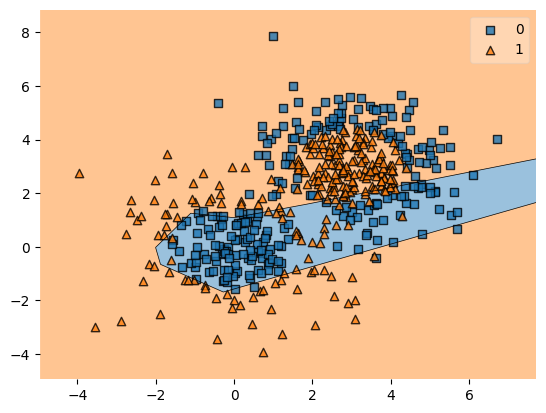

In [36]:
# importing plot decision regions from mlxtend plotting for plotting decision regions using model
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X=x, y=y.astype(np.int_), clf=model)

In [31]:
# Define the second neural network model (with Batch Normalization)
model_1 = Sequential()

# Add layers to the model:
# Dense layer with 3 units and ReLU activation for the input layer (input_dim=2 for X and Y)
model_1.add(Dense(3, activation='relu', input_dim=2))
# Add Batch Normalization layer after the first dense layer
model_1.add(BatchNormalization())
# Dense layer with 2 units and ReLU activation for a hidden layer
model_1.add(Dense(2, activation='relu'))
# Add Batch Normalization layer after the second dense layer
model_1.add(BatchNormalization())
# Dense layer with 1 unit and Sigmoid activation for the output layer (binary classification)
model_1.add(Dense(1, activation='sigmoid'))

# Display a summary of the model's architecture
model_1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 3)              │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 10 (40.00 B)

In [32]:
# Compile the second model
model_1.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [33]:
# Train the second model and store the training history
history2 = model_1.fit(x,y, epochs=100, validation_split=0.2)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.5473 - loss: 1.0245 - val_accuracy: 0.5300 - val_loss: 0.6916
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5433 - loss: 0.9737 - val_accuracy: 0.5500 - val_loss: 0.6866
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5548 - loss: 0.9652 - val_accuracy: 0.5600 - val_loss: 0.6834
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5409 - loss: 0.9806 - val_accuracy: 0.5700 - val_loss: 0.6809
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5722 - loss: 0.9312 - val_accuracy: 0.6000 - val_loss: 0.6754
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5809 - loss: 0.8992 - val_accuracy: 0.6200 - val_loss: 0.6625
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5738 - loss: 0.9091 - val_accuracy: 0.6700 - val_loss: 0.6451
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5501 - loss: 0.8927 - val_accuracy: 0.6

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

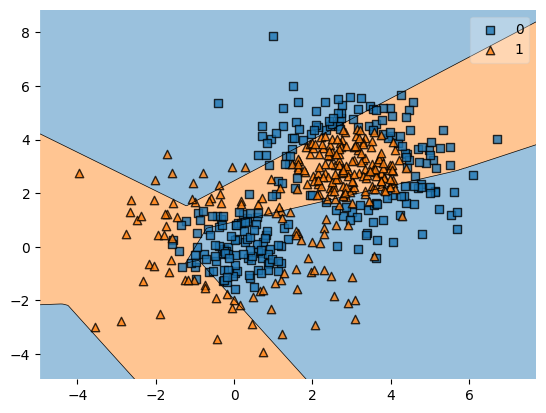

In [35]:
# importing plot decision regions from mlxtend plotting for plotting decision regions using model_1
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X=x, y=y.astype(np.int_), clf=model_1)


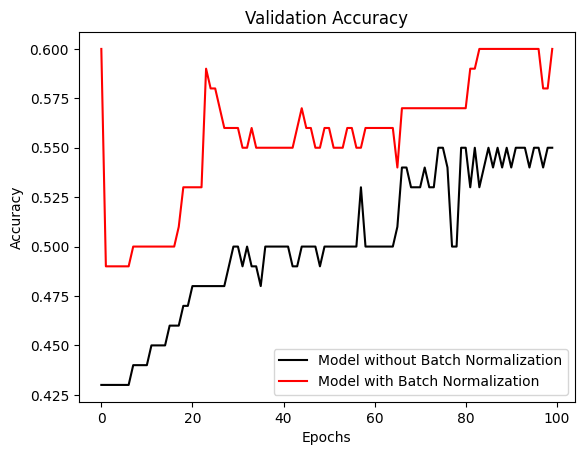

In [30]:
# Plot the validation accuracy of both models over the training epochs
# Black line for the first model (without Batch Normalization)
plt.plot(history1.history['val_accuracy'], color='black')
# Red line for the second model (with Batch Normalization)
plt.plot(history2.history['val_accuracy'], color='red')

plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Model without Batch Normalization', 'Model with Batch Normalization'])
plt.show()